# House Price Prediction in Bengaluru

## Data Import

In [193]:
import sys
sys.path.append('../modules')
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
%matplotlib inline

In [194]:
DATA_PATH = "../data/raw/datasets_20710_26737_Bengaluru_House_Data.csv"

In [195]:
# Read csv file using Pandas
df = pd.read_csv(DATA_PATH)

In [196]:
# Look at the first few rows of the dataset
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [197]:
df.shape

(13320, 9)

This shows that the dataset contans 13320 rows and 9 columns.

## Data Exploration and Visualization

In [198]:
print("missing values in the dataset columnwise:\n")
print(df.isnull().sum(axis=0))

missing values in the dataset columnwise:

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


### ---Univariate Analysis---

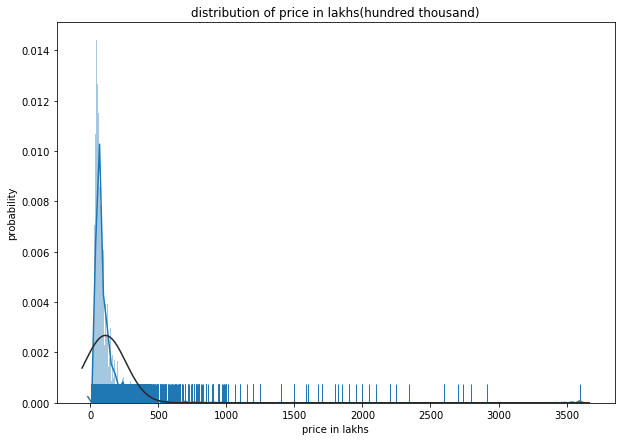

In [199]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(df['price'], kde=True, rug=True, ax=ax, bins=500, fit=stats.norm)
ax.set(title= 'distribution of price in lakhs(hundred thousand)', xlabel='price in lakhs', ylabel='probability')
plt.savefig("../figures/price_dist.png")
plt.show()

Distribution of price is highly righ skewed, so we should use transformation like log, box-cox or arcsin square root for prediction.

In [200]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 8.064469
Kurtosis: 108.166513


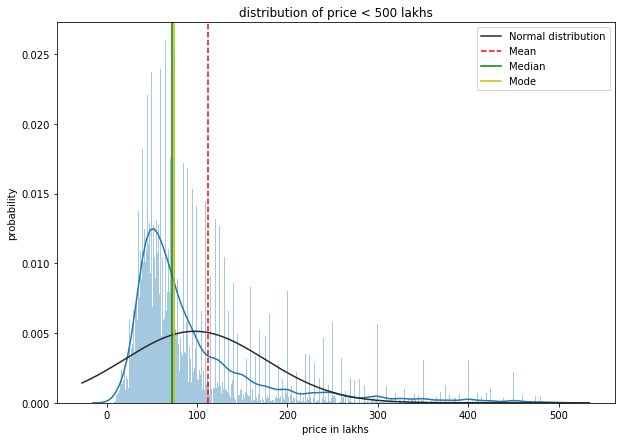

In [201]:
# Plot the distribition of the price less than 500 lakhs
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(df[df['price'] < 500]['price'], kde=True, ax=ax, bins=500, fit=stats.norm)
ax.set(title= 'distribution of price < 500 lakhs', xlabel='price in lakhs', ylabel='probability')
ax.axvline(df['price'].mean(), color='r', linestyle='--')
ax.axvline(df['price'].median(), color='g', linestyle='-')
ax.axvline(df['price'].mode().to_numpy()[0], color='y', linestyle='-')
plt.legend({'Normal distribution': stats.norm, 'Mean':df['price'].mean(),'Median':df['price'].median(), 'Mode': df['price'].mode().to_numpy()[0]})
plt.savefig("../figures/displot500.png")
plt.show()

In [202]:
print('Descriptive statistics of price column:\n')
print(df['price'].describe())

Descriptive statistics of price column:

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64


In [203]:
def plot_norm_bar(df, title, figsize=(10,6)):
    """plot bar graph of the categorical variables 
    of the dataset with parcentage
    """
    fig, ax = plt.subplots(ncols=1, figsize=figsize)
    fig.suptitle(title)
    cat_value_counts = df.fillna('missing').value_counts(normalize=True)
    sns.barplot(y = cat_value_counts.index, x= cat_value_counts.values*100)
    ax.set(xlabel= 'percentage', ylabel=str(df.name))
    plt.savefig("../figures/ "+ str(df.name)+".png")
    plt.plot()

    return

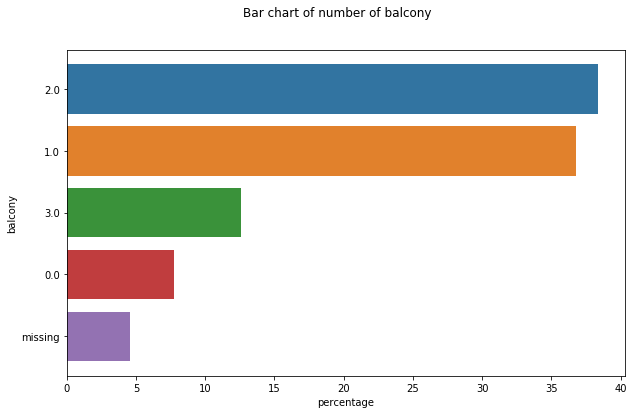

In [204]:
plot_norm_bar(df["balcony"], "Bar chart of number of balcony")

- There are more houses which has 1 or 2 balcony, around 38% each.
- Around 4% of the record has missing balcony value in the dataset.


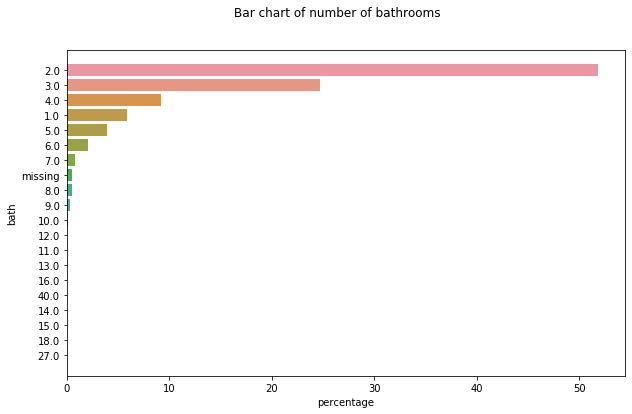

In [205]:
plot_norm_bar(df["bath"], "Bar chart of number of bathrooms")

Let us look at the property depending on are types-

In [206]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

We can drop some unneccesary features and assign this in a new variable.

In [207]:
df2 = df.drop(columns=['area_type', 'availability', 'society', 'balcony'])

In [208]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [209]:
df2.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [210]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [211]:
df3 = df2.dropna()

In [212]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

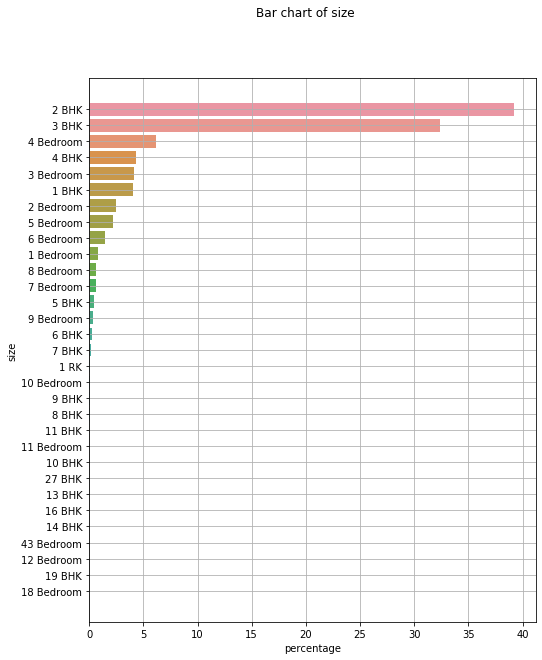

In [215]:
plot_norm_bar(df3["size"], "Bar chart of size", (8, 10))
plt.grid()

In [214]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [230]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

/Users/raktimbarua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [231]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [148]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [149]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [150]:
def convert_sqrt_to_num(x):
    """Convert the total_srft column by 
    taking the mean of ranges of the size
    """
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return True

In [151]:
convert_sqrt_to_num('21666')

21666.0

In [152]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqrt_to_num)

In [153]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


Here we can add an extra feature which is price per square feet which will help us to understand the price of the property more vividly.

In [154]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5['price_per_sqft'] = pd.to_numeric(df5['price_per_sqft'],errors='coerce')

In [155]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,4250.000000


In [156]:
len(df5.location.unique())

1304

In [157]:
df5.location = df5.location.apply(lambda x: x.strip())

In [158]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [159]:
len(location_stats[location_stats<=10])

1052

In [160]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [161]:
len(df5.location.unique())

1293

In [162]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [163]:
len(df5.location.unique())

242

### --- Outlier Dedection and Removal ---

In [164]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020,6.0,370.00,6,36274.509804


In [165]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500,3.0,100.0,3,20000.000000


In [166]:
df5.shape

(13246, 7)

In [167]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [168]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,4250.000000


In [169]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [170]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft>(m-s)) & (subdf.price_per_sqft<=(m+s))]
        df_out = pd.concat([df_out, reduce_df],ignore_index=True)
    return df_out

In [171]:
df7 = remove_pps_outliers(df6)

In [172]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235,2.0,148.0,2,11983.805668


In [173]:
df7.shape

(10241, 7)

In [176]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total square feet area')
    plt.ylabel('Price')
    plt.legend()

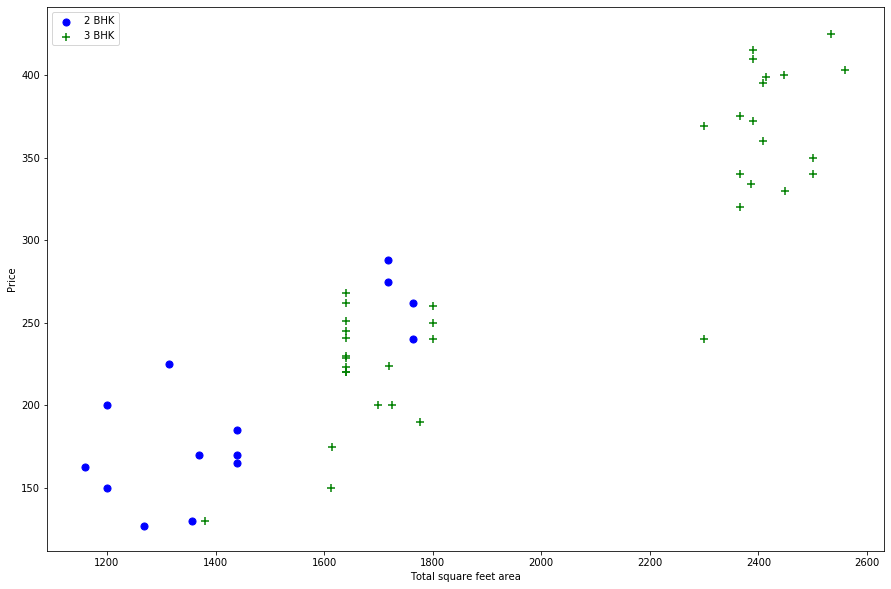

In [177]:
plot_scatter_chart(df7, 'Rajaji Nagar')

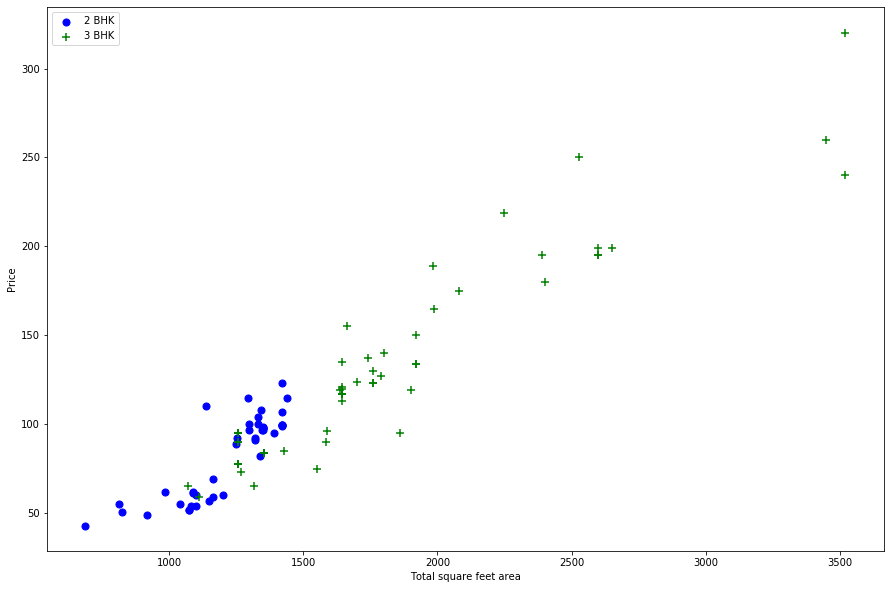

In [178]:
plot_scatter_chart(df7, 'Hebbal')

We should also remove properties where for same location, the price of (for instance) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we build a dictionary of stats per bhk i.e.
``` 
{
    '1': {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    '2' : {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    
} 
 ```
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [179]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [180]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

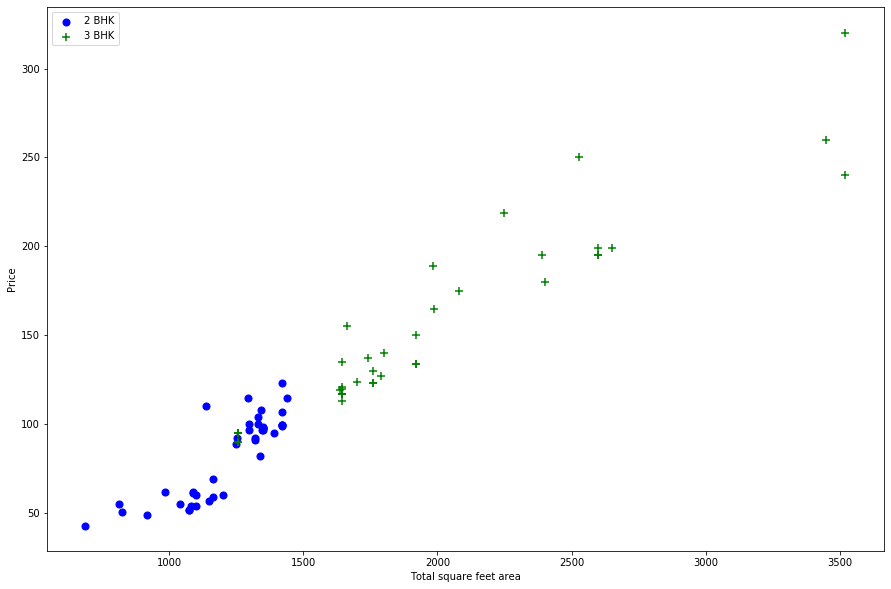

In [181]:
plot_scatter_chart(df8, 'Hebbal')

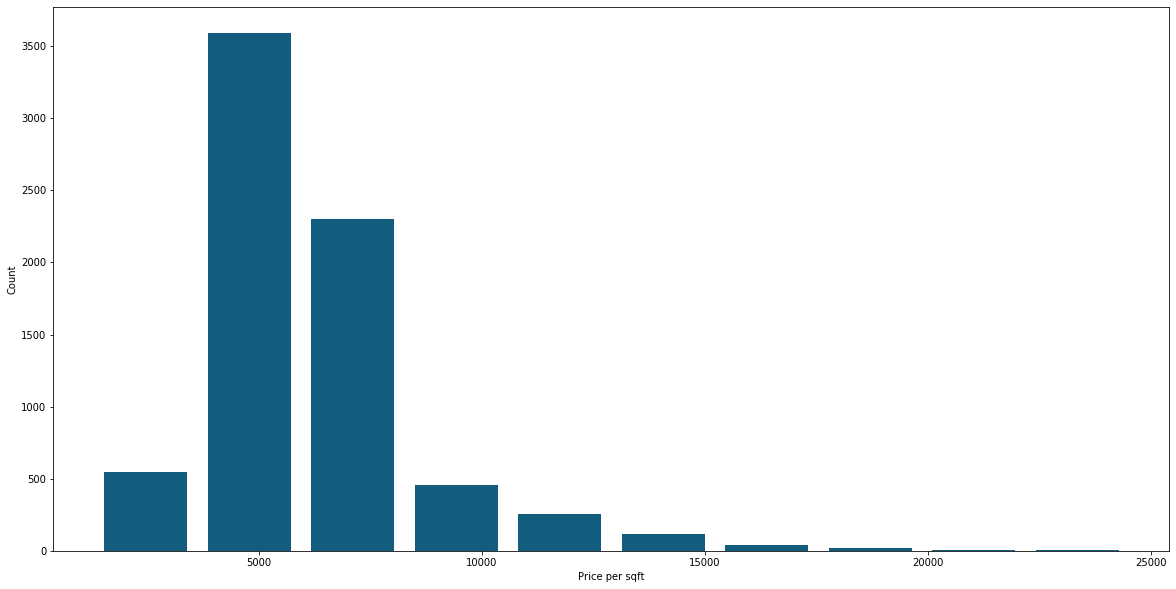

In [192]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8.price_per_sqft, rwidth=0.8, color='#125D7D')
plt.xlabel("Price per sqft")
plt.ylabel("Count")
plt.show()

In [183]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [184]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425,13.0,275.0,13,5069.124424


In [186]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [187]:
df10 = df9.drop(columns=['size', 'price_per_sqft'])

In [188]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850,4.0,428.0,4
1,1st Block Jayanagar,1630,3.0,194.0,3
2,1st Block Jayanagar,1875,2.0,235.0,3
3,1st Block Jayanagar,1200,2.0,130.0,3
4,1st Block Jayanagar,1235,2.0,148.0,2


In [189]:
df10.to_csv('../data/processed/final_data.csv', index=False)